# Домашняя работа №4

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud

**1. Библиотеки**

In [44]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
from sklearn.metrics import accuracy_score

%matplotlib inline

**1. Загрузить датасет**

In [3]:
data = pd.read_csv('creditcard_sampledata.csv')
data.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,64,1.212511,-0.099054,-1.192094,0.286324,2.160516,3.616314,-0.404207,0.842331,...,-0.167496,-0.494695,-0.149785,1.011227,0.883548,-0.329434,0.020370,0.017037,34.70,0
1,1,64,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0
2,2,124,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,...,-0.137434,-0.460991,0.189397,0.556329,0.185786,-0.189030,0.000208,0.026167,6.24,0
3,3,128,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,...,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0
4,4,132,-1.571359,1.687508,0.734670,1.293350,-0.217532,-0.002677,0.147364,0.515362,...,0.048549,0.377256,-0.030436,0.117608,-0.060520,-0.296550,-0.481570,-0.167897,10.00,0


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 32 columns):
Unnamed: 0    8000 non-null int64
Time          8000 non-null int64
V1            8000 non-null float64
V2            8000 non-null float64
V3            8000 non-null float64
V4            8000 non-null float64
V5            8000 non-null float64
V6            8000 non-null float64
V7            8000 non-null float64
V8            8000 non-null float64
V9            8000 non-null float64
V10           8000 non-null float64
V11           8000 non-null float64
V12           8000 non-null float64
V13           8000 non-null float64
V14           8000 non-null float64
V15           8000 non-null float64
V16           8000 non-null float64
V17           8000 non-null float64
V18           8000 non-null float64
V19           8000 non-null float64
V20           8000 non-null float64
V21           8000 non-null float64
V22           8000 non-null float64
V23           8000 non-null float

In [ ]:
# NaN-значений нет

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

Class
0    7983
1      17
Name: Amount, dtype: int64

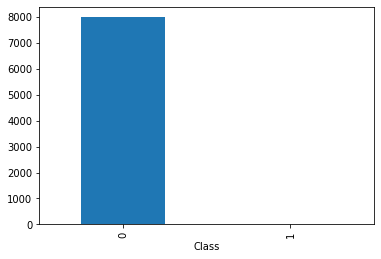

In [16]:
data_2 = data.groupby(['Class']).count()['Amount']
data_2.plot(kind='bar')
data_2

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях? Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция**

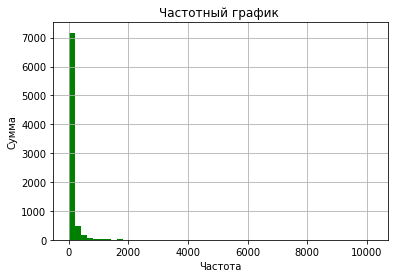

In [24]:
n, bins, patches = plt.hist(data[data['Class']==0]['Amount'], 50, facecolor='g')
plt.xlabel('Частота')
plt.ylabel('Сумма')
plt.title('Частотный график ')
plt.grid(True)
plt.show()

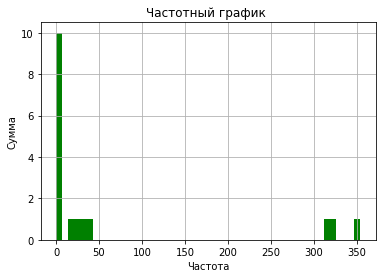

In [25]:
n, bins, patches = plt.hist(data[data['Class']==1]['Amount'], 50, facecolor='g')
plt.xlabel('Частота')
plt.ylabel('Сумма')
plt.title('Частотный график ')
plt.grid(True)
plt.show()

**5. Построить графики histograms для всех значений**

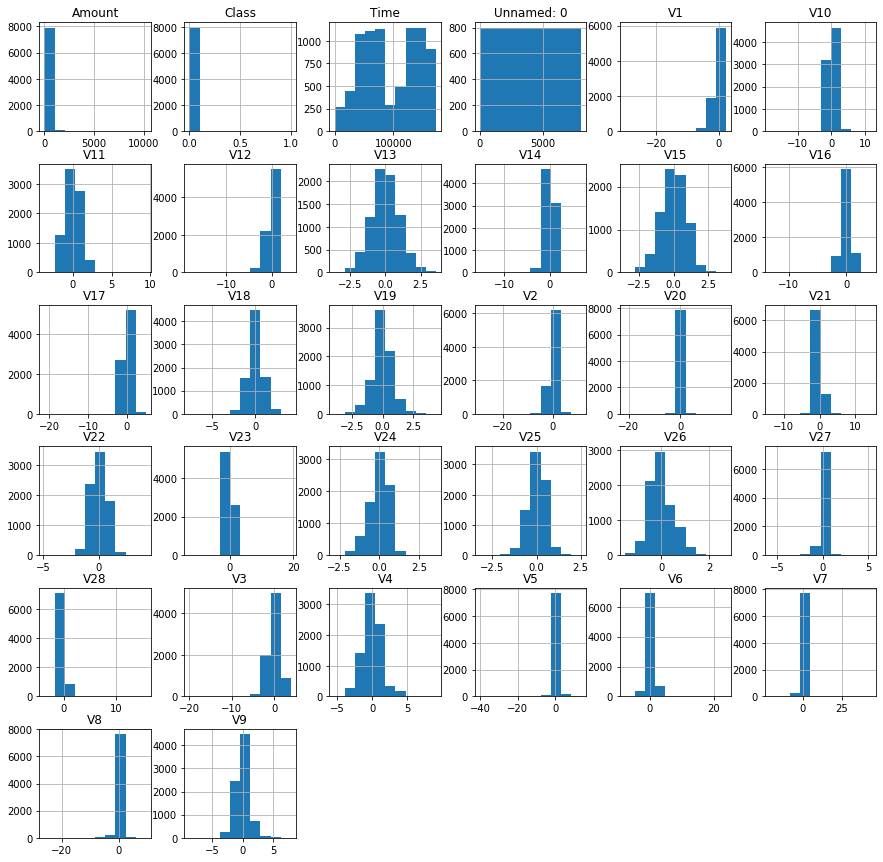

In [57]:
data.hist(figsize=(15,15))
plt.show()

**6. Построить матрицу корреляций для всех значений**

In [54]:
headers = list(data.columns.values)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data)
df_norm = pd.DataFrame(np_scaled)
df_norm.columns = headers
df_norm.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.00000,-1.000000,0.928245,0.431868,0.567334,-0.212954,0.570282,-0.279725,-0.361905,0.510607,...,-0.031350,-0.033056,-0.215096,0.197038,0.429942,-0.437884,0.044609,-0.616334,-0.993196,-1.0
1,-0.99975,-1.000000,0.812571,0.456759,0.837215,-0.292674,0.496075,-0.529799,-0.320564,0.453641,...,-0.030549,0.022981,-0.200068,0.012442,-0.000402,-0.245625,0.024081,-0.627659,-0.989217,-1.0
2,-0.99950,-0.999305,0.921613,0.463404,0.737099,0.102355,0.480315,-0.534350,-0.346827,0.463979,...,-0.029238,-0.025675,-0.193827,0.054719,0.187006,-0.371103,0.040996,-0.615390,-0.998776,-1.0
3,-0.99925,-0.999259,0.929913,0.427757,0.679910,-0.380671,0.463107,-0.585570,-0.351413,0.456298,...,-0.009312,0.180636,-0.214484,0.049067,0.369770,-0.576744,0.047565,-0.616962,-0.998274,-1.0
4,-0.99900,-0.999213,0.756116,0.519777,0.728346,-0.073970,0.482600,-0.507851,-0.345009,0.492254,...,-0.016167,0.157891,-0.207612,-0.082538,0.101251,-0.422244,-0.045332,-0.635456,-0.998039,-1.0


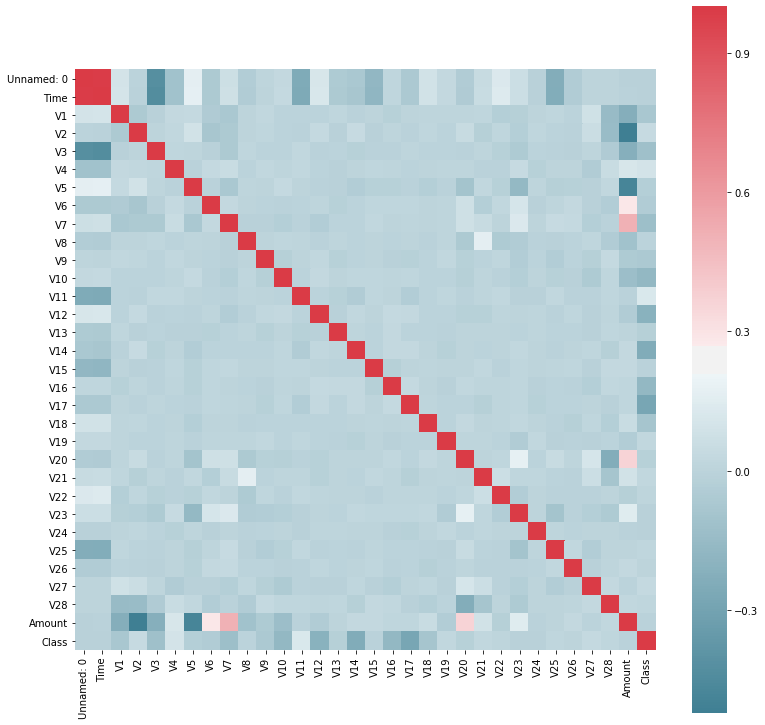

In [55]:
f, ax = plt.subplots(figsize=(13, 13))
corr = df_norm.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

**7. Выбрать несколько элементов исходя из матрицы корреляций для предсказания таргет значения Class. Построить модель логистической регрессии. Разделить датасет на 80% тренировочных данных и 20% тестовых данных. Для fit метода использовать тренировочные данные, проверить качество модели на тестовых данных. Почему модель дает такой результат?**

Для разделения на тренировочный датасет и тестовый датасет можно использовать функцию  из sklearn:

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = data['Class']
x = np.vstack([np.array(data['V14']), np.array(data['V17'])]).T

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state = 0)
model = LinearRegression().fit(x_train, y_train)

model.score(x_test, y_test)

0.1984152993101762

In [59]:
# слишком несбалансированные данные по таргету Class даёт большую вероятность ошибки

**8. Чтобы уравновесить датасет по классу Class, выберем одинаковое количество элементов из датасета по классу.** Необходимо посчитать минимальное количество (N) элементов, посчитанное в задаче 3. Выбрать N элементов рандомно из класса, имеющего бОльшее количество элементов, и все элементы из класса имеющего меньшее количество. Таким образом, мы уравновесим датасет по количеству элементов. Смоделировать логистической регрессию на полученном датасете. Посчитать качество модели. Получилось ли улучшить модель? Если да, то засчет чего?

In [88]:
from sklearn.utils import shuffle
data_count = data.groupby(['Class']).count()['Amount']
data_count = data_count.reset_index()
data_count = data_count.query('Class==1')

first = data[data['Class'] == 0].sample(n=data_count.iloc[0][1])
#first

second = data[data['Class'] == 1]
#second

result = pd.concat([first, second])
#result



-0.20206129609531343

In [95]:
# применяем модель логистической регрессии на уравновешенной выборке
y = result['Class']
x = np.vstack([np.array(result['V14']), np.array(result['V17'])]).T
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x, y,test_size = 0.2, random_state = 0)
model = LinearRegression().fit(x_train_2, y_train_2)
model.score(x_test_2, y_test_2)

-0.20206129609531384

In [ ]:
# похоже, стало совсем плохо

**9. Написать модель RandomForestClassifier на данный датасет и сравнить результаты с логистической регрессией. Почему результаты получились лучше (или хуже). Тренировочные и тестовые данные выбираем одинаковые (те же, что и для логистической регрессии), полученные на шаге 7.**

In [98]:
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)


model=RandomForestClassifier(n_estimators=500)
model.fit(x_train,y_train)
model.score(x_test, y_test)

0.99625

In [99]:
# результаты лучше, т.к. модель лучше работает с несбалансированными данными